<h2 align='center'> Sentiment Analysis on Restaurant Reviews </h2>

### Objective: 
- To build a prediction model to predict whether a review on the restaurant is positive or negative.

### About the data: 
- It consists of 1000 reviews on a restaurant.

### Structure/Steps to be Followed: 
- Importing Dataset
- Preprocessing Dataset
- Vectorization
- Training and Classification
- Analysis Conclusion

#### Acknoweldgment :
This Datset is taken from <a href='https://www.kaggle.com/hj5992/restaurantreviews'> Kaggle </a>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import re
from wordcloud import WordCloud

### Loading Dataset

In [2]:
dataset = pd.read_csv("Dataset/Restaurant_Reviews.tsv", delimiter="\t", quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Inspecting Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
dataset.dtypes

Review    object
Liked      int64
dtype: object

- Dataset have only 2 columns : one is in textual format and other is binary categorical ( 0 or 1 )

In [5]:
dataset.groupby('Liked').size()

Liked
0    500
1    500
dtype: int64

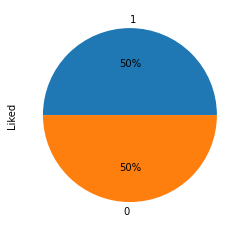

In [6]:
dataset['Liked'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

-  Dataset is Balanced 
- It doesn't have any null values

In [7]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

#### Objective : 
- Clean and Preprocess a single review then create a for loop for cleaning all 1000 reveiws



#### First review 

In [8]:
dataset['Review'][0]

'Wow... Loved this place.'

In [9]:
# Removing Numbers and Punctuations with the help of Rgular Expressions

review = re.sub( '[^a-zA-Z]', ' ', dataset['Review'][0] )
print(review)

Wow    Loved this place 


- Convert each word into its lower case / upper case (prefer lower case):
- It irrelevant to have same words in different cases (eg: ‘LOVE’ and ‘LoVe’ )

In [10]:
# Convert the string to lower 

review = review.lower()
review

'wow    loved this place '

In [11]:
import nltk
nltk.download('stopwords') #------- download stopwords

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJEEV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# stopwords.words('english') # ------------print all the 179 stopwards in english language.
len(stopwords.words('english'))

179

- There are total 179 stopwords in english language

In [13]:
review = review.split()
review

['wow', 'loved', 'this', 'place']

In [14]:
# By list comprehension, we tried to remove the stop word 

review1 = [ word for word in review if not word in set(stopwords.words('english')) ]
review1

['wow', 'loved', 'place']

### Stemming:
- Convert word to its root word

Example: 
loved ----> love, stopped ---->stop

In [15]:
# Use Stemming to take word it to its Root form

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

review1 = [ ps.stem(word) for word in review1 ]
review1

['wow', 'love', 'place']

In [16]:
# Convert list to string 

review2 = ' '.join(review1)
review2

'wow love place'

### Count-Vectorizer( )
- This will construct the vocabulary of the bag-of-words model and transform the sentences into sparse feature vectors

In [17]:
corpus1 = []

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3) # max-feature=3 means take only top 3 columns into consideration
print(review2)

corpus1.append(review2)
print(corpus1)

X = cv.fit_transform(corpus1)
print(X.toarray())

wow love place
['wow love place']
[[1 1 1]]


- Now the textual data is preprocessed and converted into numerical format, which we can use for ML model

#### Preprocessing all the rows :

In [18]:
dataset.shape

(1000, 2)

In [19]:
dataset.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


- There are 1000 rows (from 0 to 999)

#### Preprocessing 1000 rows

In [20]:
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ ps.stem(word) for word in review if not word in set(stopwords.words('english')) ]
    review = ' '.join(review)
    # print(review)
    corpus.append(review)

In [21]:
print("Review Type: ",type(review))
print("Corpus Type: ",type(corpus))

Review Type:  <class 'str'>
Corpus Type:  <class 'list'>


#### Creating DataFrame for Preprocessed Reviews

In [22]:
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [23]:
corpus_dataset['corpus'] = corpus_dataset
corpus_dataset = corpus_dataset.drop([0], axis=1)
corpus_dataset.head()

,corpus
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [24]:
# inserted liked column to preprocessed dataset: 
corpus_dataset['Sentiment'] = dataset['Liked']
corpus_dataset.head()

,corpus,Sentiment
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


### Visual represntation of positive sentiments

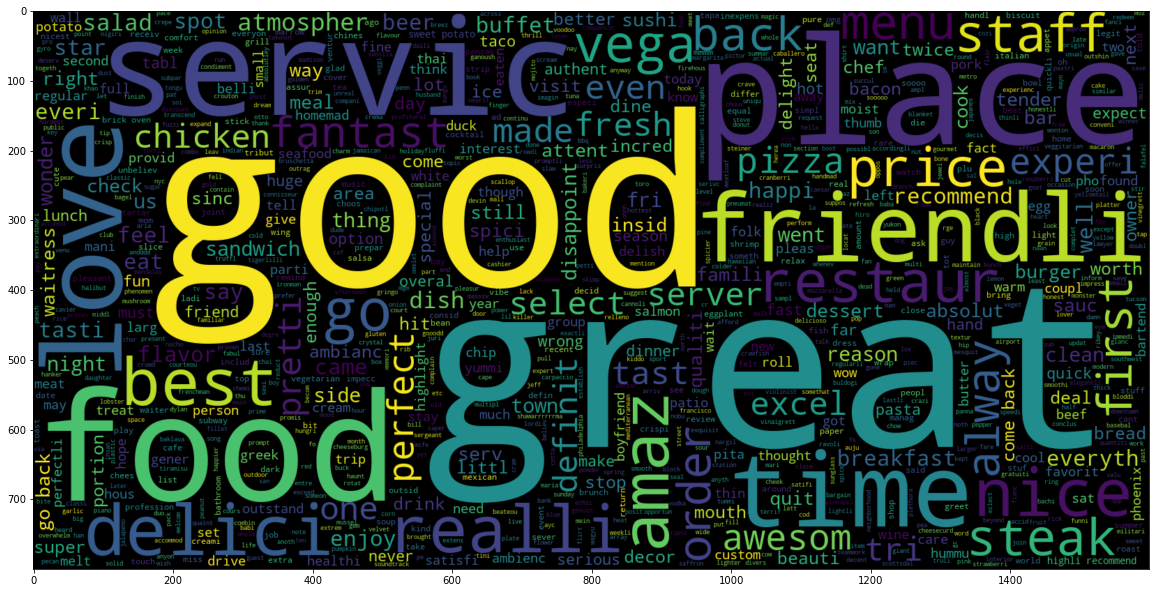

In [25]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(corpus_dataset[corpus_dataset['Sentiment'] == 1]['corpus']))
plt.imshow(wc, interpolation = 'bilinear');

### Visual represntation of negative sentiments

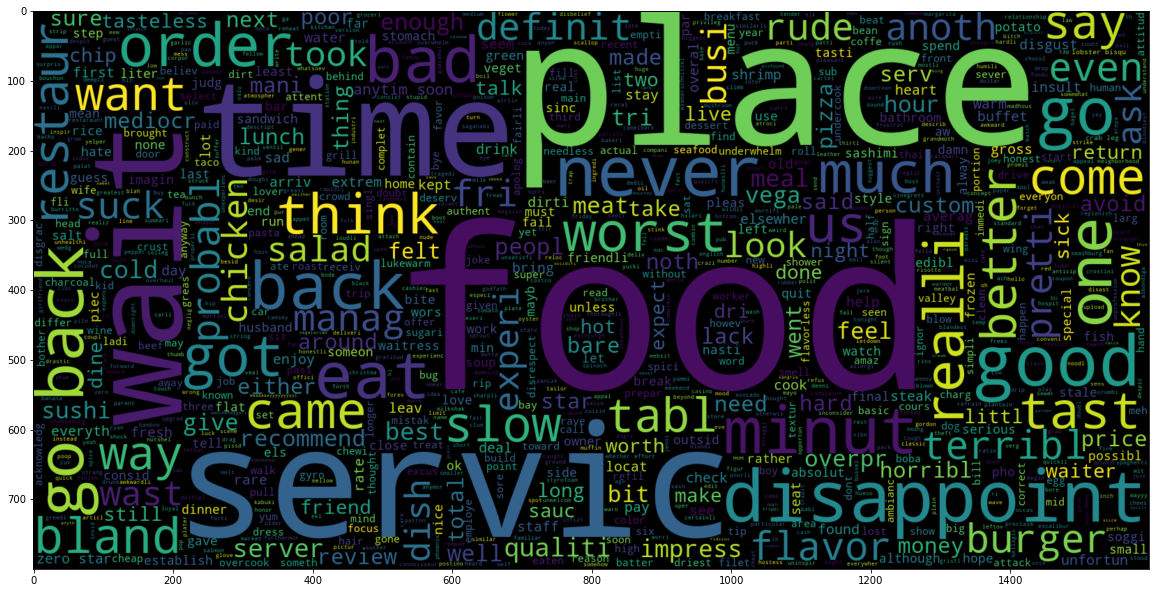

In [26]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(corpus_dataset[corpus_dataset['Sentiment'] == 0]['corpus']))
plt.imshow(wc, interpolation = 'bilinear');

In [27]:
# Saving pre-processed dataset for future reference: 
corpus_dataset.to_csv("corpus_dataset.csv")

### Bag of Words Model for whole data

In [28]:
# Create a Bag of Words Model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

In [29]:
X = cv.fit_transform(corpus).toarray()
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

- Sparse matrix is created for top 1500 columns

In [31]:
# To see  all the top 1500 seleceted feature names: 
# cv.get_feature_names()
len(cv.get_feature_names())

1500

In [32]:
# As our input data is in numpy format so changing y(target variable) in numpy array
y = dataset.iloc[:,1].values

### Splitting Data into 80-20 ratio

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred_logistic = log_reg.predict(X_test)

In [36]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_logistic)) 
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report: \n", classification_report(y_test, y_pred_logistic))

Accuracy Score:  0.71

Confusion Matrix: 
 [[76 21]
 [37 66]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        97
           1       0.76      0.64      0.69       103

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



- Model is 71% accurate in predicting review either positive or negative

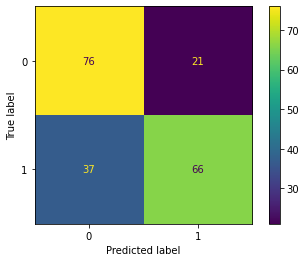

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

### Naive Bayes

In [38]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.77

Confusion Matrix: 
 [[73 24]
 [22 81]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        97
           1       0.77      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



- Model is not too good nor too bad as it is 77% accurate in predicting review either positive or negative

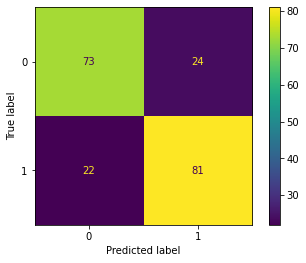

In [41]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

### Support vector Machine

In [42]:
from sklearn.svm import SVC
svc = SVC(C=15)
svc.fit(X_train, y_train)

SVC(C=15)

In [43]:
y_pred_svc = svc.predict(X_test)

In [44]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_svc))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report: \n", classification_report(y_test, y_pred_svc))

Accuracy Score:  0.77

Confusion Matrix: 
 [[83 14]
 [32 71]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78        97
           1       0.84      0.69      0.76       103

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



- Model is not too good nor too bad as it is 77% accurate in predicting review either positive or negative

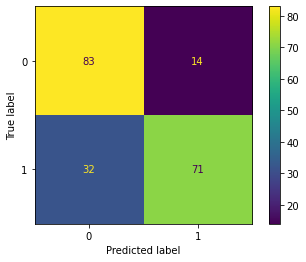

In [45]:
plot_confusion_matrix(svc, X_test, y_test)
plt.show()

### Check it on Unseen Data

In [46]:
Review = input("Enter the Review for Restaurant: ")
input1 = [Review]

input_data = cv.transform(input1).toarray()
input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")

Enter the Review for Restaurant: NiCe SerVICE!@!
Review is Positive


In [47]:
Review = input("Enter the Review for Restaurant: ")
input1 = [Review]

input_data = cv.transform(input1).toarray()
input_pred = log_reg.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")

Enter the Review for Restaurant: such a bad Experience!!late survice..
Review is Negative


### Accurcay :

In [48]:
score = { 'Algorithm' : ['Logistic Regression', 'Naive Bayes', 'SVM'], 
          'Accuracy' : [accuracy_score(y_test, y_pred_logistic),
                        accuracy_score(y_test, y_pred),
                        accuracy_score(y_test, y_pred_svc)]
        }

resultant_df = pd.DataFrame(score).sort_values(by='Accuracy', ascending=False)
resultant_df

,Algorithm,Accuracy
1,Naive Bayes,0.77
2,SVM,0.77
0,Logistic Regression,0.71


<h2 align='center'> Conclusion </h2>

### Result 
- Both Naive Bayes and SVM has 77% accuracy on test dataset to predict review to be positive or negative.